In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive #toimport google drive data

In [265]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
cd /content/drive/"My Drive"

/content/drive/My Drive


In [267]:
columnname=['X','Y','Z']
dataset=pd.read_csv("NG Machine Learning/ex2data2.txt",names=columnname)
print(dataset)
dataset.shape

            X         Y  Z
0    0.051267  0.699560  1
1   -0.092742  0.684940  1
2   -0.213710  0.692250  1
3   -0.375000  0.502190  1
4   -0.513250  0.465640  1
..        ...       ... ..
113 -0.720620  0.538740  0
114 -0.593890  0.494880  0
115 -0.484450  0.999270  0
116 -0.006336  0.999270  0
117  0.632650 -0.030612  0

[118 rows x 3 columns]


(118, 3)

In [268]:
dataset.describe()

,X,Y,Z
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [0]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

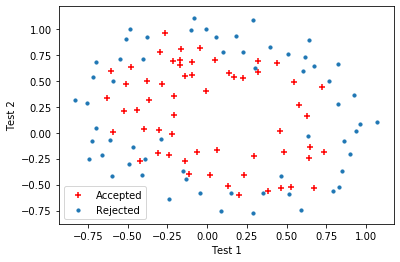

In [270]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

In [0]:

def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out

In [0]:
X = mapFeature(X[:,0], X[:,1],4)


In [0]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [0]:
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """
    #@ is used as matrix multiplication symbol in python
    
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta**2)
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    print(j_0)
    return cost[0], grad

In [275]:
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)

[0.00847458]


In [276]:
grad

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02],
       [3.76648474e-02],
       [1.83559872e-02],
       [7.32393391e-03],
       [8.19244468e-03],
       [2.34764889e-02],
       [3.93486234e-02],
       [2.23923907e-03],
       [1.28600503e-02],
       [3.09593720e-03],
       [3.93028171e-02]])

In [277]:
print("Cost at initial theta (zeros):",cost)


Cost at initial theta (zeros): 0.6931471805599461


In [0]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    #Lambda is a regularization parameter that reduces overfitting. Increasing lambda results in less overfitting but also greater bias
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [279]:
theta , J_history = gradientDescent(X,y,initial_theta,1,800,0)   #lambda=15 underfitting and lambda=0 overfitting observe for 1 also

[0.00847458]
[-0.00401255]
[-0.01203576]
[-0.01709596]
[-0.02019992]
[-0.02201685]
[-0.02299045]
[-0.0234148]
[-0.02348482]
[-0.02332965]
[-0.02303475]
[-0.02265651]
[-0.022232]
[-0.02178541]
[-0.02133238]
[-0.02088284]
[-0.02044294]
[-0.02001633]
[-0.01960503]
[-0.01920997]
[-0.01883137]
[-0.01846904]
[-0.01812251]
[-0.01779113]
[-0.0174742]
[-0.01717096]
[-0.01688065]
[-0.01660252]
[-0.01633585]
[-0.01607996]
[-0.0158342]
[-0.01559795]
[-0.01537065]
[-0.01515175]
[-0.01494076]
[-0.0147372]
[-0.01454065]
[-0.0143507]
[-0.01416697]
[-0.01398911]
[-0.01381679]
[-0.01364972]
[-0.0134876]
[-0.01333018]
[-0.0131772]
[-0.01302845]
[-0.0128837]
[-0.01274276]
[-0.01260543]
[-0.01247156]
[-0.01234097]
[-0.01221352]
[-0.01208905]
[-0.01196745]
[-0.01184858]
[-0.01173232]
[-0.01161858]
[-0.01150724]
[-0.0113982]
[-0.01129139]
[-0.0111867]
[-0.01108407]
[-0.01098341]
[-0.01088466]
[-0.01078774]
[-0.01069259]
[-0.01059916]
[-0.01050738]
[-0.0104172]
[-0.01032858]
[-0.01024145]
[-0.01015578]
[-0.01

In [280]:
J_history

[0.6931471805599461,
 0.6848428934322894,
 0.6779882271749339,
 0.671934847677255,
 0.6663770500705715,
 0.6611643401124723,
 0.6562172378022259,
 0.6514895581522906,
 0.6469514054524442,
 0.6425813949372796,
 0.6383630039101346,
 0.6342827872867138,
 0.6303294475269037,
 0.6264933059684545,
 0.6227659705950689,
 0.6191401061418134,
 0.6156092622744878,
 0.6121677381675099,
 0.6088104721872932,
 0.6055329502755581,
 0.6023311290212189,
 0.5992013706570603,
 0.5961403879252132,
 0.5931451971988236,
 0.5902130785529461,
 0.5873415417050634,
 0.584528296923987,
 0.5817712301502808,
 0.5790683816905581,
 0.5764179279472894,
 0.5738181657290432,
 0.5712674987561014,
 0.5687644260353386,
 0.5663075318280307,
 0.5638954769762209,
 0.561526991388764,
 0.5592008675181541,
 0.5569159546846166,
 0.5546711541254271,
 0.5524654146656194,
 0.5502977289216775,
 0.548167129962888,
 0.5460726883661455,
 0.5440135096094434,
 0.5419887317572905,
 0.5399975233981383,
 0.5380390817996762,
 0.53611263125282

In [281]:
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[ 3.24138736]
 [ 2.21662814]
 [ 3.56433828]
 [-5.59023313]
 [-4.01845916]
 [-4.8113571 ]
 [ 0.39382324]
 [-1.48587984]
 [-1.01622747]
 [-1.05191442]
 [-4.85467148]
 [ 0.1139688 ]
 [-1.98879557]
 [-1.49778988]
 [-4.21071541]]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

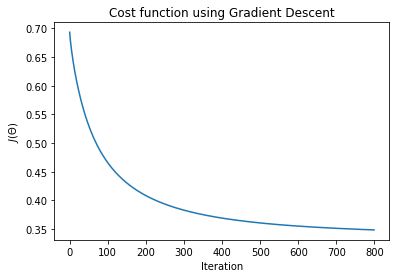

In [282]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [0]:

def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

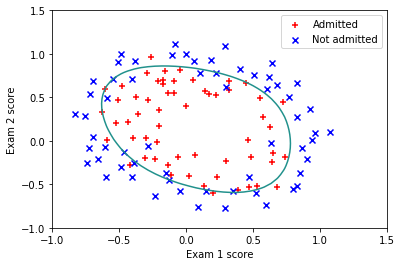

In [284]:

plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],4) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)